## **Clustering Data BMI**

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [ ]:
from google.colab import files
data = files.upload()

Saving bmi.csv to bmi.csv


In [ ]:
data = pd.read_csv('/content/bmi.csv')

In [ ]:
data

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [ ]:
data.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


# Data Normalization

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[['Height', 'Weight']])

# Clustering

In [ ]:
kmeans = KMeans (n_clusters=3, n_init=10)
kmeans.fit(data_normalized)
label=kmeans.labels_
centroid = kmeans.cluster_centers_
label

array([1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0,
       1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2,
       2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0,

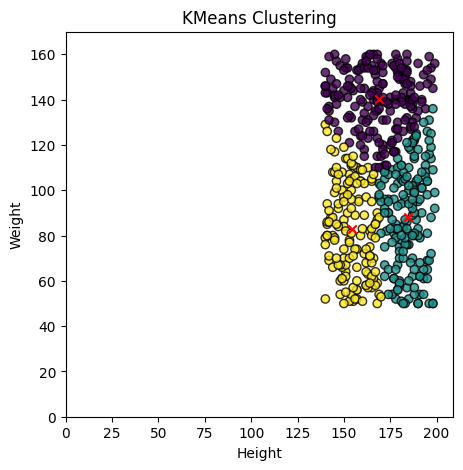

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['Height'], data['Weight'], c=label, alpha=0.8, edgecolor='k', cmap='viridis')
centroids_original = scaler.inverse_transform(centroid)
for idx, centroid in enumerate(centroids_original):
    plt.scatter(*centroid, c="red", marker='x')
plt.xlim(0, data['Height'].max() + 10)
plt.ylim(0, data['Weight'].max() + 10)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('KMeans Clustering')
plt.show()


# Evaluation

In [ ]:
CHIndex=metrics.calinski_harabasz_score(data_normalized, label)
print("CH Index untuk k=5:", CHIndex)

CH Index untuk k=5: 478.47332012378837


In [ ]:
ch_indices = []
wcss = []
for i in range(2,8):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(data_normalized)
  label=kmeans.labels_
  CHIndex=metrics.calinski_harabasz_score(data_normalized, label)
  ch_indices.append((i, CHIndex))
  wcss.append(kmeans.inertia_)
  print(f"CH Index untuk k={i}:{CHIndex}")

CH Index untuk k=2:323.07040867015263
CH Index untuk k=3:391.9716677276651
CH Index untuk k=4:482.93278493617004
CH Index untuk k=5:462.4461061520903
CH Index untuk k=6:471.33789587283513
CH Index untuk k=7:481.25973166727556


In [ ]:
optimal_k_ch, optimal_ch_index = max(ch_indices, key=lambda x: x[1])
print(f"Optimal k berdasarkan CH Index adalah {optimal_k_ch} dengan CH Index {optimal_ch_index}")

Optimal k berdasarkan CH Index adalah 4 dengan CH Index 482.93278493617004


# Elbow Method

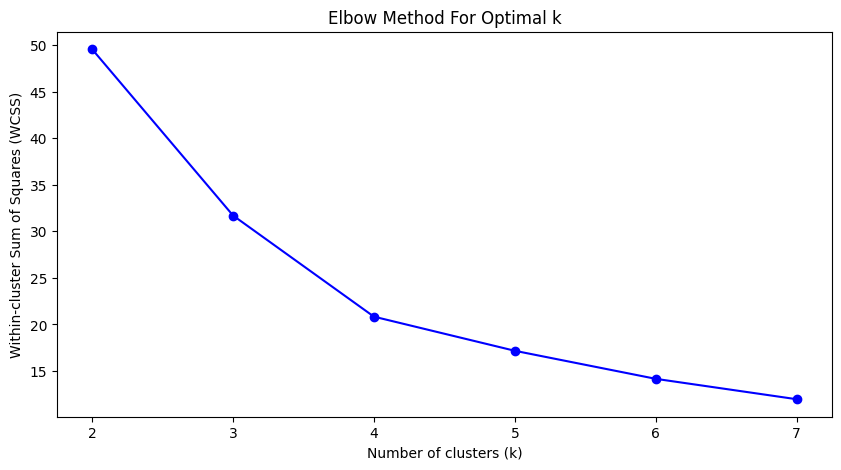

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 8), wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Kesimpulan

Jumlah cluster optimal untuk data 'Height' dan 'Weight' adalah k=4 berdasarkan analisis Indeks Calinski-Harabasz (CH) dan Metode Elbow. Data dinormalisasi terlebih dahulu menggunakan `MinMaxScaler` untuk memastikan skala yang konsisten sebelum menerapkan algoritma K-Means. Meskipun K-Means clustering awal dilakukan dengan k = 3 dan divisualisasikan, analisis lebih lanjut dengan berbagai nilai k (2 hingga 7) dilakukan untuk mengevaluasi kualitas klasterisasi. Indeks CH dihitung untuk setiap nilai k, memberikan ukuran kuantitatif terhadap kualitas klasterisasi, di mana nilai tertinggi menunjukkan hasil terbaik. Selain itu, plot Metode Elbow yang memetakan Within-cluster Sum of Squares (WCSS) terhadap jumlah cluster digunakan untuk mengidentifikasi titik "elbow" di mana penambahan cluster tidak lagi secara signifikan mengurangi WCSS. Dari grafik Metode Elbow, dapat disimpulkan bahwa nilai k = 4 dikarenakan adanya lengkungan yang cukup tajam pada titik tersebut. Berdasarkan hasil dari kedua metode ini, nilai k = 4 memberikan keseimbangan terbaik antara jumlah cluster dan kualitas klasterisasi, ditunjukkan oleh nilai Indeks CH yang tinggi dan titik elbow yang jelas. Oleh karena itu, jumlah cluster optimal ditentukan sebagai k = 4, yang mengindikasikan bahwa pembagian data ke dalam empat cluster memberikan hasil yang paling efektif